<a href="https://colab.research.google.com/github/amalvarezme/AnaliticaDatos/blob/master/1_Introduccion/1_IntroNumpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a la programación - Python

- ## [Librería numpy](https://numpy.org/) (señales discretas)

- ## [Librería sympy](https://www.sympy.org/es/) (emular señales continuas)

In [2]:
import numpy as np # importar libreria numpy
import matplotlib.pyplot as plt
x = 30 #tipo int
y = 36.5 #tipo float

print(type(x),type(y)) #imprimir en pantalla

<class 'int'> <class 'float'>


# Arreglo de datos en numpy

- Señales en continuo

  $x(t) \in \mathbb{R}, \mathbb{C}$

  $t \in \mathbb{R}$

- Señales discretas

  $x[t_k] \in \mathbb{R}, \mathbb{C}$  

  $t \in \{t_0,t_1,\dots,t_{K-1}\}$; $K \in \mathbb{N}$ muestras

- Señales digitales

  $x[t_k] \in \{x_0,x_1,\dots,x_{P-1}\};$ $P\in \mathbb{N}$ estados según cantidad de bits del sistema de proceso

  $t \in \{t_0,t_1,\dots,t_{K-1}\}$; $K \in \mathbb{N}$ muestras

In [ ]:
xv = np.array([0,-2.5,10]) #crear array tipo vector
xv

# Listas vs numpy array

- Las listas pueden contener, números, strings, y en general objetos

- Los array de numpy están pensados para procesar números (matrices, tensores).

In [ ]:
xl = [0,-2,0.5] # no es señal digital -> lista de números
xl

In [ ]:
xl = ["andres marino",0.5, 2] #lista de tres elementos con un string, un flotante y un entero
xl

# Tamaños, indexación y graficar numpy array

In [ ]:
xv.shape # vector con 3 elementos - > shape retorna la forma (tamaño del arreglo)

In [ ]:
xm = np.array([[0,-2.5,10,4],[6,47,70,2],[8,10.2,-698,-0.9]]) #cada lista de números es tratada como una fila de la matriz
xm

In [ ]:
xm.shape

# En python se indexa desde 0

In [ ]:
xv = np.array([-6,5,4.2,3,8,50,16])
print(xv,xv.shape,xv[0])

# En Python, cuando se indexa por rangos de valores, no se incluye el último elemento

x[t_i,t_f)

In [ ]:
xv[1:5] # x[t_0] # no se incluye el elemento 5 que equivale a x[5] = 50

*Cuando se piden todos los elementos hasta el final con el operador : si se incluye el último elemento*

In [ ]:
# desde el segundo elemento hasta el ultimo
print(xv)
print(xv[1:])

In [ ]:
#desde antes del tercer elmento hasta el principio
print(xv)
print(xv[:3])

# Para matrices se extiende la misma sintaxis para indexar vectores, pero separando la indexación por filas y por columnas

In [ ]:
print(xm)

In [ ]:
xm[0:2,:2]

In [ ]:
xm[0:2,0]

In [ ]:
xm[0,1:]

In [ ]:
np.diag(xm)#diagonal del arreglo (matriz)

# Simular cero y pendiente  para acondicionamiento de señales

- Se generará una función para emular el proceso de cero y pendiente en el acondicionamiento de señales.

- Las funciones principales para generar vectores equiespaciados son [linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html), [range](https://www.w3schools.com/python/ref_func_range.asp) y [arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)

In [ ]:
# crear vector tiempo por rango y por número de muestras
K = 200 # número de muestras
ti = -15 # tiempo incial referencia [s]
tf = 10 # tieimpo final  [s]
# vector de tiempo equiespacioado
tv = np.linspace(start=ti,stop=tf,num=K)
print(tv)
print(tv.shape)
# tiempo muestreo se define según el rango de trabajo en segundos y la cantidad de muestras
Ts = (tf - ti)/K
print(Ts)

- Supongamos la función cuadrática:

$x(t) = a t^2 + b;$

$\forall t \in [t_i,t_f]$

- Se pretende generar el proceso de discretización según:

$x[t_k] = a t_k^2 + b$





In [ ]:
#parámetros parabola
a = 4
b = -3
xv = a*(tv**2) + b # creamos parabola en tiempo discreto-> **  pontencia
print(xv)
print(xv.shape)

In [ ]:
import matplotlib.pyplot as plt #librería para gráficas básicas en python

plt.plot(tv,xv,'r.') #vector en eje horizontal, vector eje vertical, color y marcador
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$') # $ $ ecuación latex
plt.show() #mostrar gráfica

## Cálculo de pendiente y del offset (cero)

$$ y[t_k] \in [y_{min},y_{max}]$$

$$y[t_k] = m x[t_k] + c$$

$$m = \frac{y_{max}-y_{min}}{x_{max}-x_{min}}$$

$$c = y[t_k] - m x[t_k]$$

- Se crea un código tipo función bajo el ambiente def, para generar el cero y pendiente según los valores $y_{max}$ y $y_{min}$ definidos por el usuario.

In [ ]:
y_min = 0 # valor min después de cero y pendiente
y_max = 5 # valor max después de cero y pendiente
#crear funcion en python
def my_ceropen(x,ymin = -5, ymax = 5): #en general se pueden definir valores por defecto
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv

In [ ]:
yv = my_ceropen(xv,ymin=-8.5,ymax=1.5) #se llama la función definida en la celda anterior

In [ ]:
print(yv)
print(yv.shape)

- Se grafican la señal original y la señal acondicionada mediante [subplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html)

In [ ]:
plt.subplot(121) # 1 = #filas, 2 = #columnas, 1 = # dibujo
plt.plot(tv,xv,'r.')
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$')

plt.subplot(122)
plt.plot(tv,yv,'b.')
plt.xlabel('tiempo [s]')
plt.ylabel('$y[t_k]$')
plt.subplots_adjust(hspace=0.5,wspace=0.5) #ajustar espaciado entre gráficas
plt.show()

In [ ]:
plt.plot(tv,xv,'r.')
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$')

In [ ]:
plt.plot(tv,yv,'b.')
plt.xlabel('tiempo [s]')
plt.ylabel('$y[t_k]$')

- Se ilustra nuevamente el proceso de acondicionamiento cero y pendiente mediante utilizando una función senoidal

$$x[t_k] = A \sin[w_o t + \phi]$$

$$x[t_k] = A \sin[2 \pi F_o t] = A \sin[2 \pi t / T_o ]$$



In [ ]:
K = 500 # número de muestras
T_o = 1/60 # periodo función sin
A = 120 # amplitud
ti = 0 #tiempo inicial
tf = T_o*2 #tiempo final
tv = np.linspace(ti,tf,num=K) #vector de datos en tiempo
xv = A * np.sin(2*np.pi*tv/T_o) #vector de amplitud

plt.plot(tv,xv)
plt.xlabel('tiempo [s]')
plt.ylabel('$A\sin[\omega t_k]$')
plt.show()

In [ ]:
xv.shape

In [ ]:
yv = my_ceropen(xv,ymin=0,ymax=5) #se utiliza la función ya creada de cero y pendiente

In [ ]:
plt.subplot(121) # 1 = #filas, 2 = #columnas, 1 = # dibujo
plt.plot(tv,xv,'r.')
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$')

plt.subplot(122)
plt.plot(tv,yv,'b.')
plt.xlabel('tiempo [s]')
plt.ylabel('$y[t_k]$')
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()

# Ejercicio:

- Realice un ejemplo ilustrativo para la solución de un problema lineal por mínimos cuadrados de la forma:


\begin{aligned}
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1P} \\
x_{21} & x_{22} & \cdots & x_{2P} \\
\vdots & \vdots & \ddots & \vdots\\
x_{N1} & x_{N2} & \cdots & x_{NP}
\end{bmatrix} & \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_P \end{bmatrix} =& \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{bmatrix}
\end{aligned}

$$\mathbf{X}\mathbf{w} = \mathbf{y}$$

- Tal que:

$$\mathbf{w}^* = \arg\min_\mathbf{w} \|\mathbf{y} - \mathbf{X}\mathbf{w}\|^2_2$$

en donde $\mathbf{y} = \mathbf{y}^* + \mathbf{\eta},$ con $\mathbf{y}^*\in \mathbb{R}^N$ y $\mathbf{\eta}\sim p(\mathbf{\eta})=\mathcal{N}(\mathbf{\eta}|\mathbf{\mu}_\eta,\sigma^2_\eta \mathbf{I})$.

- Consulte en qué consiste la solución por pseudoinversa y realice una implementación en numpy utilizando la descomposición en [valores singulares](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) para $N=100$, $P=3$, $w_1=3.5$, $w_2=-0.5$, $w_3=10$, para una relación cuadrática entrada salida. Asumo ruido Gaussiano con $\sigma^2_\eta=5$ y $\mu=-3$.

*Ayuda*: Revise el los métodos `np.linalg.eig`, `np.linalg.svd` y `np.linalg.pinv`.

- Qué estarategia propone para mitigar el efecto de la media del ruido (traslación en la estimación)?

In [12]:
#Ayuda de código:
#Generación de datos
N = 100 # numero de datos
var = 5 # varianza del ruido
mu = -30 #media del ruido
w = np.array([3.5,-0.5,10]).reshape(-1,1) #cargas tipo vector columna
eta = mu + np.sqrt(var)*np.random.randn(N)

x = np.linspace(-5,5,N)
Xm = np.c_[x[...,np.newaxis]**2,x.reshape(-1,1),np.ones((N,1))] #puede utilizar newaxis o reshape para formar columnas

y = Xm.dot(w)
yn = y + eta[...,np.newaxis]

print(yn.shape,y.shape, Xm.shape, w.shape,eta.shape)

(100, 1) (100, 1) (100, 3) (3, 1) (100,)


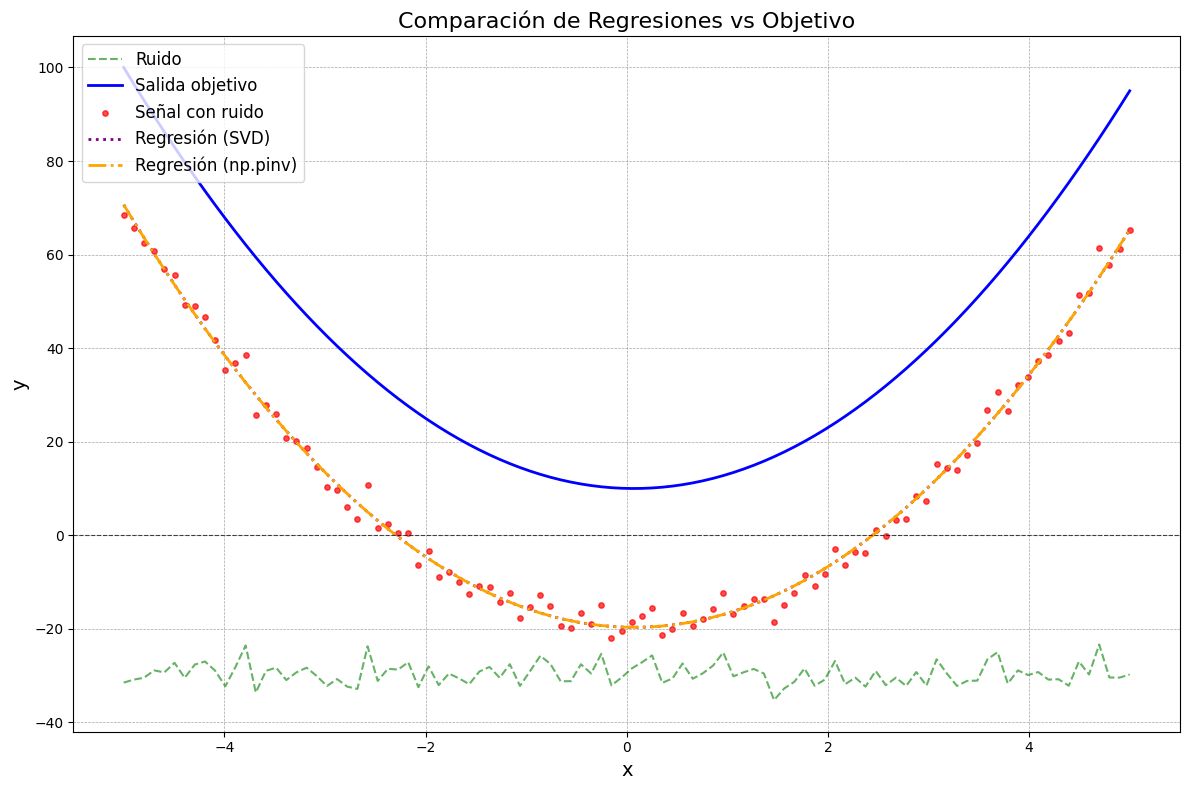

In [14]:
"""-------------pseudoinversa con SVD-----------------"""
U, S, VT = np.linalg.svd(Xm, full_matrices=False)

S_inv = np.diag(1 / S)  # Invertir valores singulares

Xm_pseudo_inv_svd = VT.T @ S_inv @ U.T

# Estimación de los coeficientes w_hat usando SVD
w_hat_svd = Xm_pseudo_inv_svd @ yn

# Estimación de la salida con w_hat_svd
y_hat_svd = Xm @ w_hat_svd


"""-------------pseudoinversa con np.pinv-----------------"""
# Calcular la pseudoinversa de Xm
Xm_pseudo_inv = np.linalg.pinv(Xm)

# Calcular la estimación de los coeficientes w_hat
w_hat_pinv = Xm_pseudo_inv @ yn

# Graficar la estimación de la salida usando w_hat
y_hat_pinv = Xm @ w_hat_pinv


plt.figure(figsize=(12, 8))
plt.plot(x, eta, label='Ruido', linestyle='--', color='green', alpha=0.6)
plt.plot(x, y, label='Salida objetivo', color='blue', linewidth=2)
plt.scatter(x, yn, label='Señal con ruido', color='red', s=15, alpha=0.7)
plt.plot(x, y_hat_svd, label='Regresión (SVD)', color='purple', linewidth=2, linestyle='dotted')
plt.plot(x, y_hat_pinv, label='Regresión (np.pinv)', color='orange', linewidth=2, linestyle='dashdot')

plt.title('Comparación de Regresiones vs Objetivo', fontsize=16)
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.axhline(0, color='black', linewidth=0.8, linestyle='dashed', alpha=0.7)
plt.grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.7)
plt.legend(fontsize=12, loc='upper left')
plt.tight_layout()
plt.show()
